Top 5 Selected Features and Accuracies:
1. Features: (0, 1, 2, 3), Accuracy: 1.0
2. Features: (0, 2, 3), Accuracy: 1.0
3. Features: (0, 1, 3), Accuracy: 1.0
4. Features: (0, 2, 3), Accuracy: 1.0
5. Features: (0, 1, 3), Accuracy: 1.0


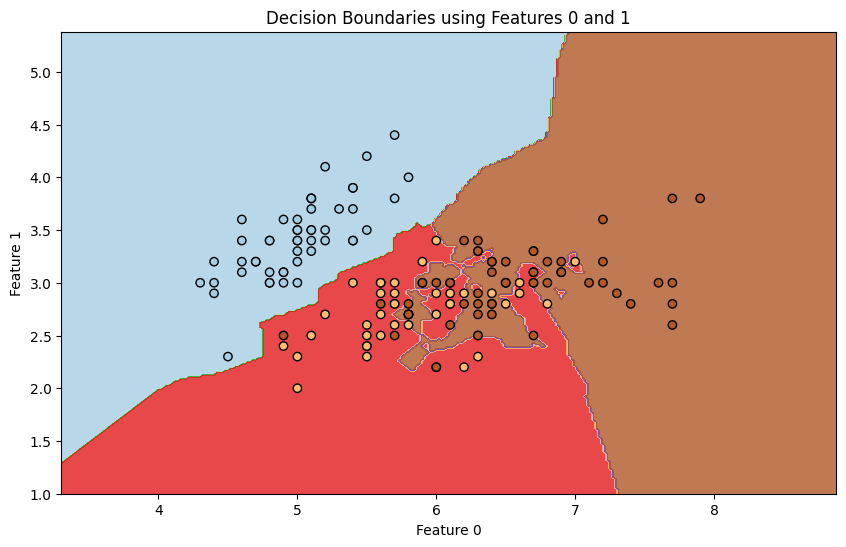

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = KNeighborsClassifier(n_neighbors=3)

def evaluate_subset(features):
    """
    Function to evaluate the performance of a subset of features using a classifier.
    """
    # Select the subset of features
    X_train_subset = X_train[:, features]
    X_test_subset = X_test[:, features]

    # Train the classifier
    classifier.fit(X_train_subset, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test_subset)

    # Evaluate the performance
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

def iterative_deepening_feature_selection(max_depth):
    """
    Iterative Deepening for feature selection.
    """
    num_features = X.shape[1]
    current_subset = list(range(num_features))  # Start with all features
    best_solutions = [(tuple(current_subset), evaluate_subset(current_subset))]

    # Iterative Deepening iterations
    for depth in range(max_depth):
        improvement_found = False
        new_solutions = []

        # Evaluate neighbors (remove one feature at a time)
        for feature_to_remove in current_subset:
            neighbor_subset = tuple([feature for feature in current_subset if feature != feature_to_remove])
            accuracy = evaluate_subset(neighbor_subset)

            # Update if the neighbor is better or equally good
            best_accuracy = max([acc for _, acc in best_solutions])
            if accuracy >= best_accuracy:
                new_solutions.append((neighbor_subset, accuracy))
                improvement_found = True

        # Update best solutions
        best_solutions.extend(new_solutions)
        best_solutions = sorted(best_solutions, key=lambda x: x[1], reverse=True)[:5]  # Keep the top 5 solutions

        # Break if no improvement is found
        if not improvement_found:
            break

    return best_solutions



def plot_decision_boundaries(features):
    """
    Plot decision boundaries using the selected features.
    """
    h = .02  # Step size in the mesh

    x_min, x_max = X[:, features[0]].min() - 1, X[:, features[0]].max() + 1
    y_min, y_max = X[:, features[1]].min() - 1, X[:, features[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Train the classifier on the full dataset using the selected features
    classifier.fit(X[:, features], y)

    # Predict the class for each point in the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot the data points
    plt.scatter(X[:, features[0]], X[:, features[1]], c=y, edgecolors='k', cmap=plt.cm.Paired)

    plt.title(f'Decision Boundaries using Features {features[0]} and {features[1]}')
    plt.xlabel(f'Feature {features[0]}')
    plt.ylabel(f'Feature {features[1]}')
    plt.show()

# Specify the maximum depth for Iterative Deepening
max_depth = 2

# Run Iterative Deepening feature selection
best_solutions = iterative_deepening_feature_selection(max_depth)

# Display the results
print("Top 5 Selected Features and Accuracies:")
for idx, (selected_features, accuracy) in enumerate(best_solutions, 1):
    print(f"{idx}. Features: {selected_features}, Accuracy: {accuracy}")


# Plot decision boundaries using the top selected features
top_features = best_solutions[0][0][:2]  # Using the top selected features for visualization
plot_decision_boundaries(top_features)
